In [1]:
# import matplotlib
# matplotlib.use('Agg')
import pandas as pd
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import gzip
import random
import io
plt.ioff()

In [2]:
class Stem(object):
    def __init__(self, chosen, cost=None):
        self.chokepoints, self.fpsee = zip(*chosen)
    
    def __len__(self):
        return len(self.chokepoints)

In [3]:
# outfiles = glob.glob("../../mainstream/data/cpp/atc/logs/*-2.v*")
# sample_prob = .05
outfiles = ["../../mainstream/data/cpp/atc/logs/stems_cpp.mainstream-300.sim.042518-6.v1.gz"]
# sample_prob = .2
# outfiles = ["../../mainstream/data/cpp/atc/logs/stems_cpp.mainstream-50.000000.sim.042518-2.v1"]
sample_prob = 1

f1s_by_setup = []
reading_stems = False

def gopen(filename):
    if filename.endswith('.gz'):
        return gzip.open(filename, 'rb')
    return open(filename)

for outfile in outfiles:
    with gopen(outfile) as f:
        with io.BufferedReader(f) as reader:
            print("Processing", outfile)
            f1s = []
            stats = {}
            idx = 0
            prev_len = 0
            steps = []
            steps_ch = []
            prev_ch = None
            for i, line in enumerate(reader):
                line = line.strip()
                if i % 20000 == 0:
                    print(i)
                if i > 1000000:
                    break
                if line == b"====":
                    if random.random() < sample_prob:
                        stats['steps'] = steps
                        stats['steps_ch'] = steps_ch
                        f1s_by_setup.append([stats, f1s])
                        f1s = []
                        stats = {}
                        idx = 0
                        prev_len = 0
                        steps = []
                        steps_ch = []
                        prev_ch = None
                    reading_stems = False
                elif line == b"----":
                    reading_stems = not reading_stems
                elif reading_stems:
                    f1 = line.split(b"\t")[1]
                    if f1 not in (b"NoResult", b"Overbudget"):
                        f1 = 1. - float(f1)
                        f1s.append(f1)
                        stem = eval(line.split(b"\t")[0])
                        if len(stem) != prev_len:
                            prev_len = len(stem)
                            steps.append(idx)
                        if tuple(stem.chokepoints) != prev_ch:
                            prev_ch = tuple(stem.chokepoints)
                            steps_ch.append(idx)
                        idx += 1
                else:
                    if b": " in line:
                        k, v = line.split(b": ")
                        stats[k] = v
                    else:
                        stats['schedule'] = line

Processing ../../mainstream/data/cpp/atc/logs/stems_cpp.mainstream-300.sim.042518-6.v1.gz
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000


In [4]:
num_sample = 10
if len(f1s_by_setup) > num_sample:
    f1s_sample = random.sample(f1s_by_setup, num_sample)
else:
    f1s_sample = f1s_by_setup
len(f1s_by_setup)

5

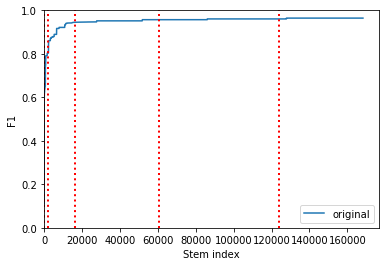

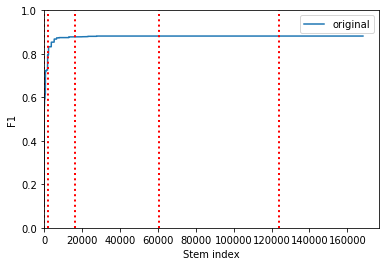

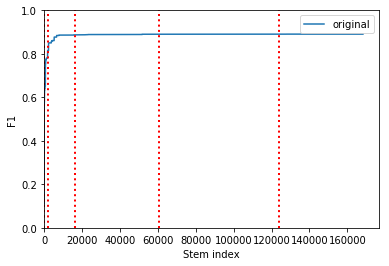

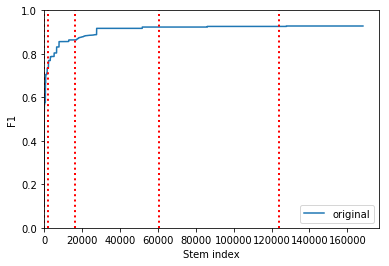

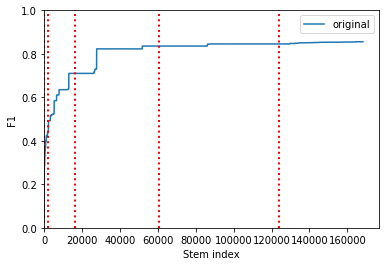

In [5]:
for stats, f1s in f1s_sample:
    k = stats[b'Config']
    plt.figure()
    x = range(len(f1s))
    y_ = sorted(f1s)

#     y = np.cumsum(y_)
    plt.plot(x, y_, label='original')
#     plt.plot(range(len(f1s_z)), sorted(f1s_z), label='zeros removed')
    plt.legend()
    if len(stats['steps_ch']) < 30:
        for xx in stats['steps_ch']:
            plt.axvline(xx, ls='dotted', color='blue', linewidth=.5)
    for xx in stats['steps']:
        plt.axvline(xx, ls='dotted', color='red', linewidth=2)
    plt.ylim(0, 1)
    plt.xlim(0, None)
    plt.ylabel('F1')
    plt.xlabel('Stem index')
    print(k)
    plt.savefig("../plots/f1space/6-300_stems_f1_cdf_{}.pdf".format(k.decode("utf-8")))
    plt.savefig("../plots/f1space/6-300_stems_f1_cdf_{}.png".format(k.decode("utf-8")), dpi=300)

b'46a0e435.v1'
b'6f9cd215.v1'
b'597051ba.v1'
b'1334b176.v1'
b'0154e1c4.v1'


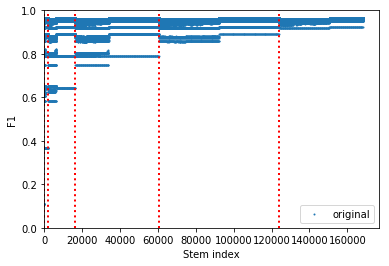

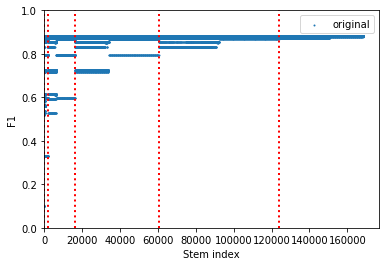

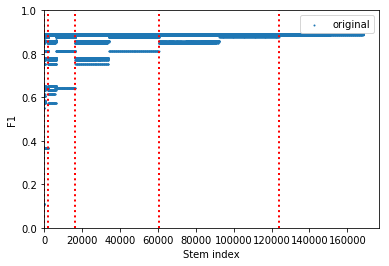

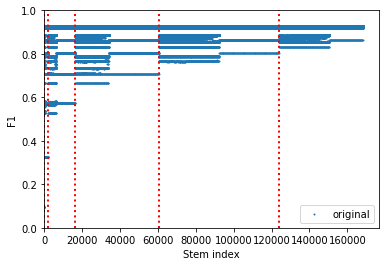

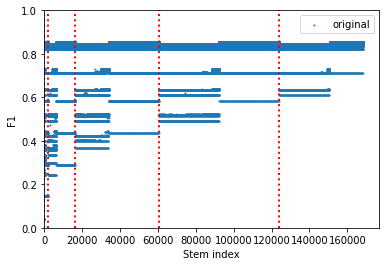

In [11]:
i = 0
for stats, f1s in f1s_sample:
    k = stats[b'Config']
    plt.figure()
    x = range(len(f1s))
    y_ = f1s
    plt.scatter(x, y_, label='original', s=1)
#     plt.scatter(range(len(f1s)), f1s_z, label='zeros removed')
    plt.legend()
#     for xx in [50, 500, 1700, 2750, 3002]:
    if len(stats['steps_ch']) < 30:
        for xx in stats['steps_ch']:
            plt.axvline(xx, ls='dotted', color='blue', linewidth=.5)
    for xx in stats['steps']:
        plt.axvline(xx, ls='dotted', color='red', linewidth=2)
    plt.ylim(0, 1)
    plt.xlim(0, None)
    plt.ylabel('F1')
    plt.xlabel('Stem index')
    print(k)
#     plt.savefig("../plots/f1space/6-300_stems_f1_seq_{}.pdf".format(k.decode("utf-8")))
    plt.savefig("../plots/f1space/6-300_stems_f1_seq_{}.png".format(k.decode("utf-8")), dpi=300)
    i += 1
